# Importing Libraries


In [5]:
import numpy as np
import os

import tensorflow as tf
from tensorflow.keras import layers 
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


# Images count Images folder

In [8]:
count = 0
dirs =  os.listdir('Images/')
for dir in dirs:
    files = list(os.listdir('Images/'+dir))
    print( dir +' Folder has ' + str(len(files)) + 'Images')
    count = count + len(files)
print('Images Folder Has '+ str (count) + ' Images ')

.ipynb_checkpoints Folder has 0Images
Bird Folder has 18Images
cat Folder has 30Images
dog Folder has 30Images
elephant Folder has 30Images
snake Folder has 22Images
Images Folder Has 130 Images 


# Load images in to array 

In [11]:
base_dir = 'Images/'
img_size = 180
batch = 32


In [13]:
train_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                       seed=123,
                                                       validation_split=0.2,
                                                       subset='training',
                                                       batch_size=batch,
                                                       image_size=(img_size, img_size))

val_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                     seed=123,
                                                     validation_split=0.2,
                                                     subset='validation',
                                                     batch_size=batch,
                                                     image_size=(img_size, img_size))


Found 130 files belonging to 5 classes.
Using 104 files for training.
Found 130 files belonging to 5 classes.
Using 26 files for validation.


In [15]:
animal_names = train_ds.class_names # Extract the class names (labels) from the training dataset
animal_names

['Bird', 'cat', 'dog', 'elephant', 'snake']

In [17]:
import matplotlib.pyplot as plt

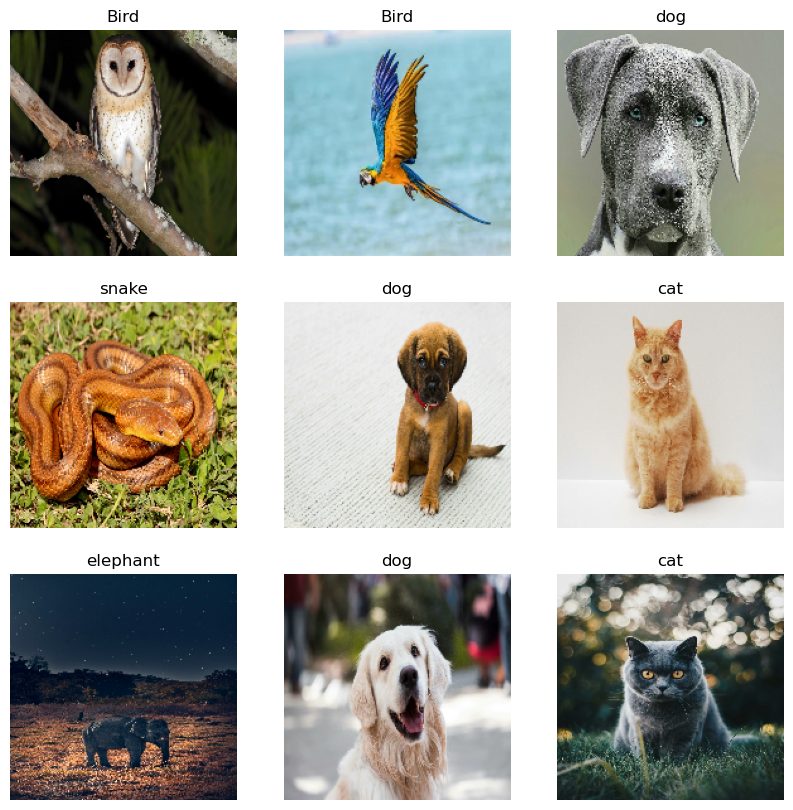

In [19]:
i = 0
plt.figure(figsize=(10,10))# Create a new figure for plotting with a size of 10x10 inches


# Loop through one batch of data from the training dataset
# train_ds is assumed to be a pre-defined dataset
for images, labels in train_ds.take(1):# .take(1) fetches a single batch
    for i in range (9): # Loop through the first 9 images in the batch
        plt.subplot(3,3, i+1) # Create a subplot in a 3x3 grid, placing the current image in the (i+1)-th position
        plt.imshow(images[i].numpy().astype('uint8'))# Set the title of the subplot to the corresponding animal name
        plt.title(animal_names[labels[i]])
        plt.axis('off')

In [21]:
AUTOTUNE = tf.data.AUTOTUNE

In [23]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [25]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

# Data Augmentation

In [30]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape=(img_size, img_size, 3)),  # Assuming RGB images
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

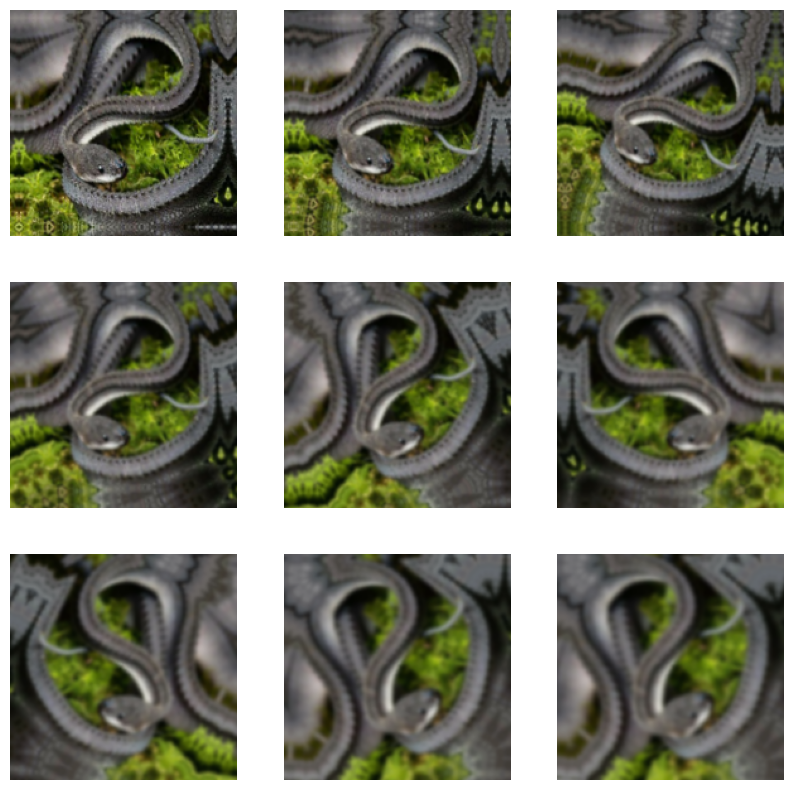

In [32]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range (9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

# Creating a Model

In [35]:
model = Sequential([data_augmentation,
                    layers.Rescaling(1./255),
                    Conv2D(16, 3, padding='same', activation='relu'),
                    MaxPooling2D(),
                    Conv2D(32, 3, padding='same', activation='relu'),
                    MaxPooling2D(),
                    Conv2D(64, 3, padding='same', activation='relu'),
                    MaxPooling2D(),
                    Dropout(0.2),
                    Flatten(),
                    Dense(128, activation='relu'),
                    Dense(5)
                    
])

In [37]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [39]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
history = model.fit(train_ds, epochs= 15, validation_data=val_ds)


Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 275ms/step - accuracy: 0.1588 - loss: 1.6606 - val_accuracy: 0.0385 - val_loss: 1.6363
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.1682 - loss: 1.6195 - val_accuracy: 0.2692 - val_loss: 1.5905
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.3241 - loss: 1.5460 - val_accuracy: 0.1923 - val_loss: 1.5537
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.4251 - loss: 1.4344 - val_accuracy: 0.2308 - val_loss: 1.9276
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.3854 - loss: 1.3456 - val_accuracy: 0.4231 - val_loss: 1.4307
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.5115 - loss: 1.1744 - val_accuracy: 0.3077 - val_loss: 1.6369
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.4021 - loss: 1.2922 - val_accuracy: 0.3846 - val_loss: 1.5339
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.4690 - loss: 1.1488 - val_accuracy: 0.4231 - val_loss:

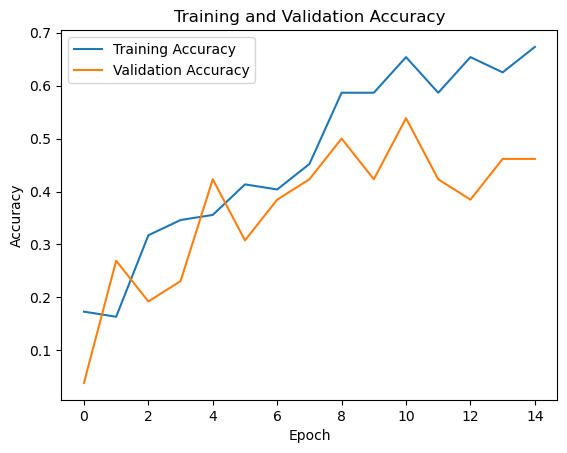

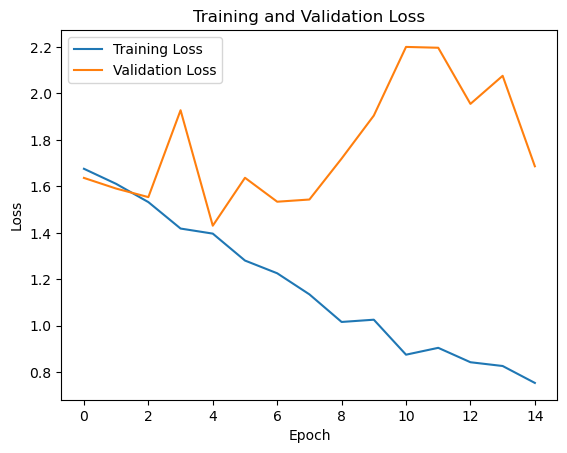

In [44]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [42]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'Our Model Says It : ' + animal_names[np.argmax(result)] + ' With a score of' + str(np.max(result)*100)
    return outcome

In [44]:
classify_images('Sample/cat.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


'Our Model Says It : cat With a score of66.83005094528198'

In [46]:
model.save('Animal_Rec_Model.h5')